In [3]:
from matplotlib import pyplot as plt
from sympy import symbols, Eq, solve
import numpy as np

In [4]:
x, c, c1, c2 = symbols('x c c1 c2')
u1 = (1 / (4 * c)) * x ** 2 + (9 / (16 * c)) * x ** (4 / 3) + c1 * x + c2
u2 = (x ** 4) / 8 + (9 / 40) * x ** (10 / 3) + c1 * x + c2

In [5]:
def find_constants(a, b, ua, ub, c_value, type='kc'):
    if type == 'kc':
        u = u1
    elif type == '1/k':
        u = u2
        c_value = 1
    eq1 = Eq(u.subs(x, a).subs(c, c_value), ua)
    eq2 = Eq(u.subs(x, b).subs(c, c_value), ub)

    solution = solve([eq1, eq2], (c1, c2))
    return float(solution[c1]), float(solution[c2])

In [17]:
a = 0.1
b = 0.8
ua = 6.0
ub = 0.6

values = [
    (1, ua, ub),
    (10, ua, ub),
    (0.1, ua, ub),
    None,
    (1, -ua, ub),
    (1, ua, -ub),
    (1, -ua, -ub),
]

us = []
for i, value in enumerate(values):
    if not value:
        C, UA, UB = 1, ua, ub
        c1_val, c2_val = find_constants(a, b, UA, UB, C, type='1/k')
        u = u2.subs(c1, c1_val).subs(c2, c2_val).subs(c, C)
    else:
        C, UA, UB = value
        c1_val, c2_val = find_constants(a, b, UA, UB, C)
        u = u1.subs(c1, c1_val).subs(c2, c2_val).subs(c, C)
    us.append(u)
    print(f"i = {i + 1}: {c1_val = }, {c2_val = }")

i = 1: c1_val = -8.498762939765825, c2_val = 6.82126735678751
i = 2: c1_val = -7.792733436833726, c2_val = 6.776412449964465
i = 3: c1_val = -15.55905796908683, c2_val = 7.269816425017964
i = 4: c1_val = -7.9400361013966885, c2_val = 6.7938866743909125
i = 5: c1_val = 8.644094203091317, c2_val = -6.893018357498204
i = 6: c1_val = -10.21304865405154, c2_val = 6.992695928216082
i = 7: c1_val = 6.929808488805603, c2_val = -6.721589786069632


In [18]:
ys = []
x_list = np.linspace(a, b, 100)
for u in us:
    ys.append(np.array([u.subs(x, xp) for xp in x_list]))

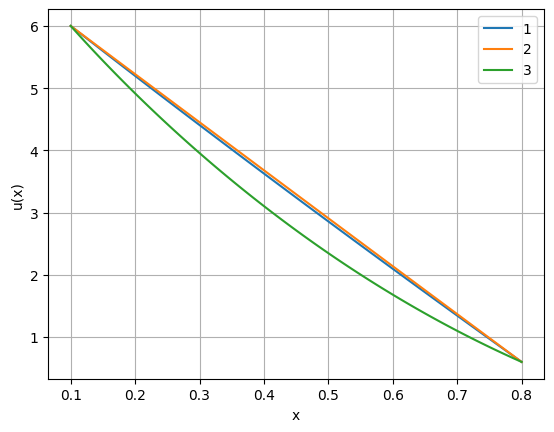

In [19]:
plt.plot(x_list, ys[0], label="1")
plt.plot(x_list, ys[1], label="2")
plt.plot(x_list, ys[2], label="3")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

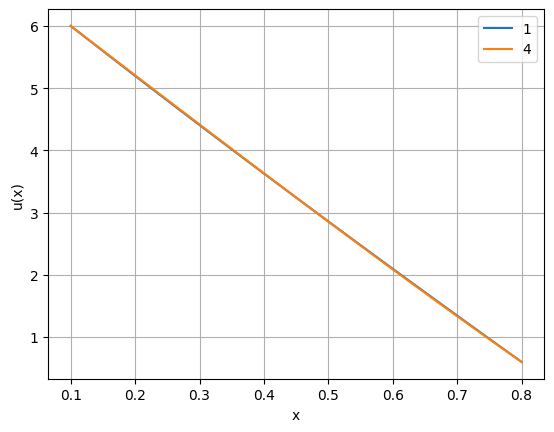

In [20]:
plt.plot(x_list, ys[0], label="1")
plt.plot(x_list, ys[3], label="4")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

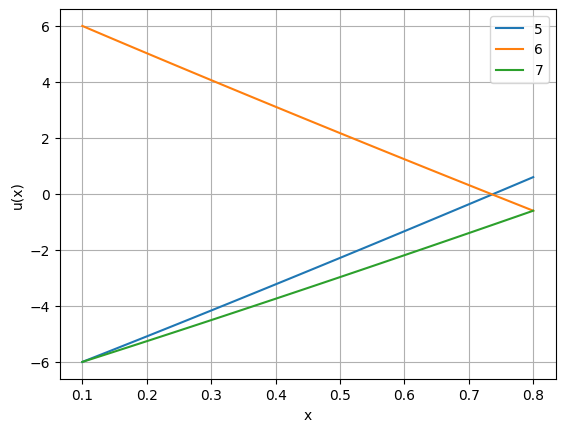

In [21]:
plt.plot(x_list, ys[4], label="5")
plt.plot(x_list, ys[5], label="6")
plt.plot(x_list, ys[6], label="7")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()